In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import datetime
import pytz
import requests

In [2]:
#This will extract the detector health of all the freeways in D12 by year
def generate_params(year):
    date = f'01/01/{year} 00:00:00'

    gmt = pytz.timezone('GMT')  # Use GMT timezone
    start_datetime = gmt.localize(datetime.datetime.strptime(date, '%m/%d/%Y %H:%M:%S'))

    time_id = int(start_datetime.timestamp())

    params = {
        'report_form': '1',
        'dnode': 'District',
        'content': 'detector_health',
        'tab': 'dh_summary',
        'export': 'xls',
        'district_id': '12',
        's_time_id': str(time_id),
        's_time_id_f': start_datetime.strftime('%m/%d/%Y'),
        'eqpo': '',
        'gb': 'fwy',
        'st_cd': 'on',
        'st_ch': 'on',
        'st_ff': 'on',
        'st_hv': 'on',
        'st_ml': 'on',
        'st_fr': 'on',
        'st_or': 'on',
        'vt': 'pct',
        'tag': '',
        'construction': '',
    }

    return params

In [3]:
cookies = {
    'nmstat': '427c4c1c-3146-c5f9-1ad3-3d495785a86b',
    '__utmz': '267661199.1706304002.1.1.utmcsr=(direct)|utmccn=(direct)|utmcmd=(none)',
    '_ga': 'GA1.2.1813768829.1706303996',
    '_ga_WLDEF7NZZ2': 'GS1.1.1707246298.4.0.1707246298.0.0.0',
    '_ga_PXR8P55JR4': 'GS1.1.1707246298.4.0.1707246298.0.0.0',
    '_ga_69TD0KNT0F': 'GS1.1.1707246298.4.0.1707246298.0.0.0',
    '__utma': '158387685.1813768829.1706303996.1708129754.1708129754.1',
    '__utmz': '158387685.1708129754.1.1.utmcsr=(direct)|utmccn=(direct)|utmcmd=(none)',
    'PHPSESSID': '92bfc6d5b469854c5bf587ec58fd08cc',
    '__utma': '267661199.1813768829.1706303996.1708971123.1709251083.22',
    '__utmc': '267661199',
    '__utmt': '1',
    '__utmb': '267661199.7.10.1709251083',
}

headers = {
    'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.7',
    'Accept-Language': 'en-US,en;q=0.9',
    'Cache-Control': 'max-age=0',
    'Connection': 'keep-alive',
    # 'Cookie': 'nmstat=427c4c1c-3146-c5f9-1ad3-3d495785a86b; __utmz=267661199.1706304002.1.1.utmcsr=(direct)|utmccn=(direct)|utmcmd=(none); _ga=GA1.2.1813768829.1706303996; _ga_WLDEF7NZZ2=GS1.1.1707246298.4.0.1707246298.0.0.0; _ga_PXR8P55JR4=GS1.1.1707246298.4.0.1707246298.0.0.0; _ga_69TD0KNT0F=GS1.1.1707246298.4.0.1707246298.0.0.0; __utma=158387685.1813768829.1706303996.1708129754.1708129754.1; __utmz=158387685.1708129754.1.1.utmcsr=(direct)|utmccn=(direct)|utmcmd=(none); PHPSESSID=92bfc6d5b469854c5bf587ec58fd08cc; __utma=267661199.1813768829.1706303996.1708971123.1709251083.22; __utmc=267661199; __utmt=1; __utmb=267661199.7.10.1709251083',
    'Referer': 'https://pems.dot.ca.gov/?fwy=1&dir=N&s_time_id=1709078400&dnode=Freeway&content=fwy_latlngXY&district_id=12',
    'Sec-Fetch-Dest': 'document',
    'Sec-Fetch-Mode': 'navigate',
    'Sec-Fetch-Site': 'same-origin',
    'Sec-Fetch-User': '?1',
    'Upgrade-Insecure-Requests': '1',
    'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/122.0.0.0 Safari/537.36',
    'sec-ch-ua': '"Chromium";v="122", "Not(A:Brand";v="24", "Google Chrome";v="122"',
    'sec-ch-ua-mobile': '?0',
    'sec-ch-ua-platform': '"macOS"',
}

In [4]:
#This outputs the above request into an excel

def print_d12det_health():
    output_direct = '/Users/joelt/datahere/xlsx_files'

    for year in range(2002, 2025):
        params = generate_params(year)
        response = requests.get('https://pems.dot.ca.gov/', params=params, cookies=cookies, headers=headers)

        # Save the response content to a file
        filename = os.path.join(output_direct, f'd12det_health{year}.xlsx')
        with open(filename, 'wb') as file:
            file.write(response.content)

        print(f'{filename} created successfully.')

print_d12det_health()

/Users/joelt/datahere/xlsx_files/d12det_health2002.xlsx created successfully.
/Users/joelt/datahere/xlsx_files/d12det_health2003.xlsx created successfully.
/Users/joelt/datahere/xlsx_files/d12det_health2004.xlsx created successfully.
/Users/joelt/datahere/xlsx_files/d12det_health2005.xlsx created successfully.
/Users/joelt/datahere/xlsx_files/d12det_health2006.xlsx created successfully.
/Users/joelt/datahere/xlsx_files/d12det_health2007.xlsx created successfully.
/Users/joelt/datahere/xlsx_files/d12det_health2008.xlsx created successfully.
/Users/joelt/datahere/xlsx_files/d12det_health2009.xlsx created successfully.
/Users/joelt/datahere/xlsx_files/d12det_health2010.xlsx created successfully.
/Users/joelt/datahere/xlsx_files/d12det_health2011.xlsx created successfully.
/Users/joelt/datahere/xlsx_files/d12det_health2012.xlsx created successfully.
/Users/joelt/datahere/xlsx_files/d12det_health2013.xlsx created successfully.
/Users/joelt/datahere/xlsx_files/d12det_health2014.xlsx created 

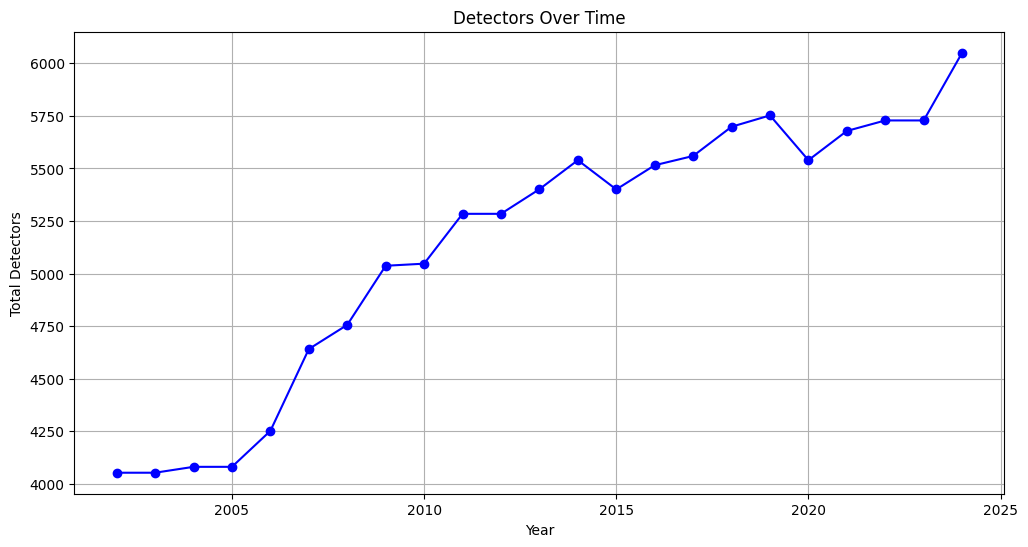

In [5]:
years = list(range(2002, 2025))
file_paths = [f'xlsx_files/d12det_health{year}.xlsx' for year in years]

detectors_data = pd.DataFrame(index=years, columns=['Total Detectors'])

for year, file_path in zip(years, file_paths):
    df = pd.read_excel(file_path)
    total_detectors = (df['# Det']).sum()
    # total_detectors = (df['# Det']*df["% Good"]).sum().round()
    # total_detectors = df["% Good"].mean()
    detectors_data.loc[year, 'Total Detectors'] = total_detectors

plt.figure(figsize=(12, 6))
plt.plot(detectors_data.index, detectors_data['Total Detectors'], marker='o', linestyle='-', color='b')
# plt.title('Number of "Good Detectors" Over Time (2002-2024)')
plt.title('Detectors Over Time')
plt.xlabel('Year')
plt.ylabel('Total Detectors')
plt.grid(True)
plt.show()


In [6]:
merged_data = pd.DataFrame()

for year in range(2002, 2025):
    file_name = f'xlsx_files/d12det_health{year}.xlsx'
    
    if os.path.exists(file_name):
        df = pd.read_excel(file_name)
        df = df[["Freeway", "# Det", "% Good"]]
        df = df.rename(columns={"% Good": f"% Good {str(year)[2:]}", "# Det": f"# Det {str(year)[2:]}"})
        
        if merged_data.empty:
            merged_data = df
        else:
            merged_data = pd.merge(merged_data, df, on="Freeway", how="outer")
    else:
        print(f"File {file_name} does not exist.")

merged_data.head()

,Freeway,# Det 02,% Good 02,# Det 03,% Good 03,# Det 04,% Good 04,# Det 05,% Good 05,# Det 06,...,# Det 20,% Good 20,# Det 21,% Good 21,# Det 22,% Good 22,# Det 23,% Good 23,# Det 24,% Good 24
0,I5-N,629.0,46.263911,629.0,67.885533,590.0,76.779661,590.0,65.084746,606.0,...,792.0,79.419192,816.0,74.387255,830.0,68.192771,830.0,41.807229,831.0,64.861613
1,I5-S,660.0,49.393939,660.0,70.606061,631.0,73.058637,631.0,59.112520,618.0,...,802.0,77.556110,828.0,74.758454,846.0,64.184397,846.0,44.799054,845.0,63.550296
2,SR22-E,111.0,56.756757,111.0,57.657658,111.0,70.270270,111.0,55.855856,112.0,...,218.0,90.825688,218.0,89.908257,218.0,73.394495,218.0,77.064220,219.0,89.497717
3,SR22-W,122.0,54.098361,122.0,67.213115,122.0,80.327869,122.0,63.114754,125.0,...,222.0,88.288288,225.0,90.666667,225.0,78.222222,225.0,82.222222,225.0,93.333333
4,SR55-N,161.0,29.192547,161.0,63.975155,156.0,78.205128,156.0,69.871795,197.0,...,218.0,83.944954,231.0,89.177489,231.0,83.982684,231.0,87.012987,278.0,83.812950


In [7]:
#Lat/Long of each freeway in D12

df = pd.read_excel('xlsx_files/d12det_health2024.xlsx')
for freeway in df['Freeway']:
    fwy_number = ''.join(filter(str.isdigit, freeway))
    direction = freeway[-1]
    
    params = {
        'report_form': '1',
        'dnode': 'Freeway',
        'content': 'fwy_latlngXY',
        'export': 'xls',
        'fwy': fwy_number,
        'dir': direction,
        'district_id': '12',
        'text.x': '1',
        'text.y': '1',
    }

    output_direct = '/Users/joelt/datahere/xlsx_files'
    response = requests.get('https://pems.dot.ca.gov/', params=params, cookies=cookies, headers=headers)

    filename = os.path.join(output_direct, f'{freeway}.xlsx')
    with open(filename, 'wb') as file:
        file.write(response.content)

    print(f'{filename} created successfully.')


/Users/joelt/datahere/xlsx_files/SR1-N.xlsx created successfully.
/Users/joelt/datahere/xlsx_files/SR1-S.xlsx created successfully.
/Users/joelt/datahere/xlsx_files/I5-N.xlsx created successfully.
/Users/joelt/datahere/xlsx_files/I5-S.xlsx created successfully.
/Users/joelt/datahere/xlsx_files/SR22-E.xlsx created successfully.
/Users/joelt/datahere/xlsx_files/SR22-W.xlsx created successfully.
/Users/joelt/datahere/xlsx_files/SR55-N.xlsx created successfully.
/Users/joelt/datahere/xlsx_files/SR55-S.xlsx created successfully.
/Users/joelt/datahere/xlsx_files/SR57-N.xlsx created successfully.
/Users/joelt/datahere/xlsx_files/SR57-S.xlsx created successfully.
/Users/joelt/datahere/xlsx_files/SR73-N.xlsx created successfully.
/Users/joelt/datahere/xlsx_files/SR73-S.xlsx created successfully.
/Users/joelt/datahere/xlsx_files/SR74-E.xlsx created successfully.
/Users/joelt/datahere/xlsx_files/SR74-W.xlsx created successfully.
/Users/joelt/datahere/xlsx_files/SR91-E.xlsx created successfully.
/

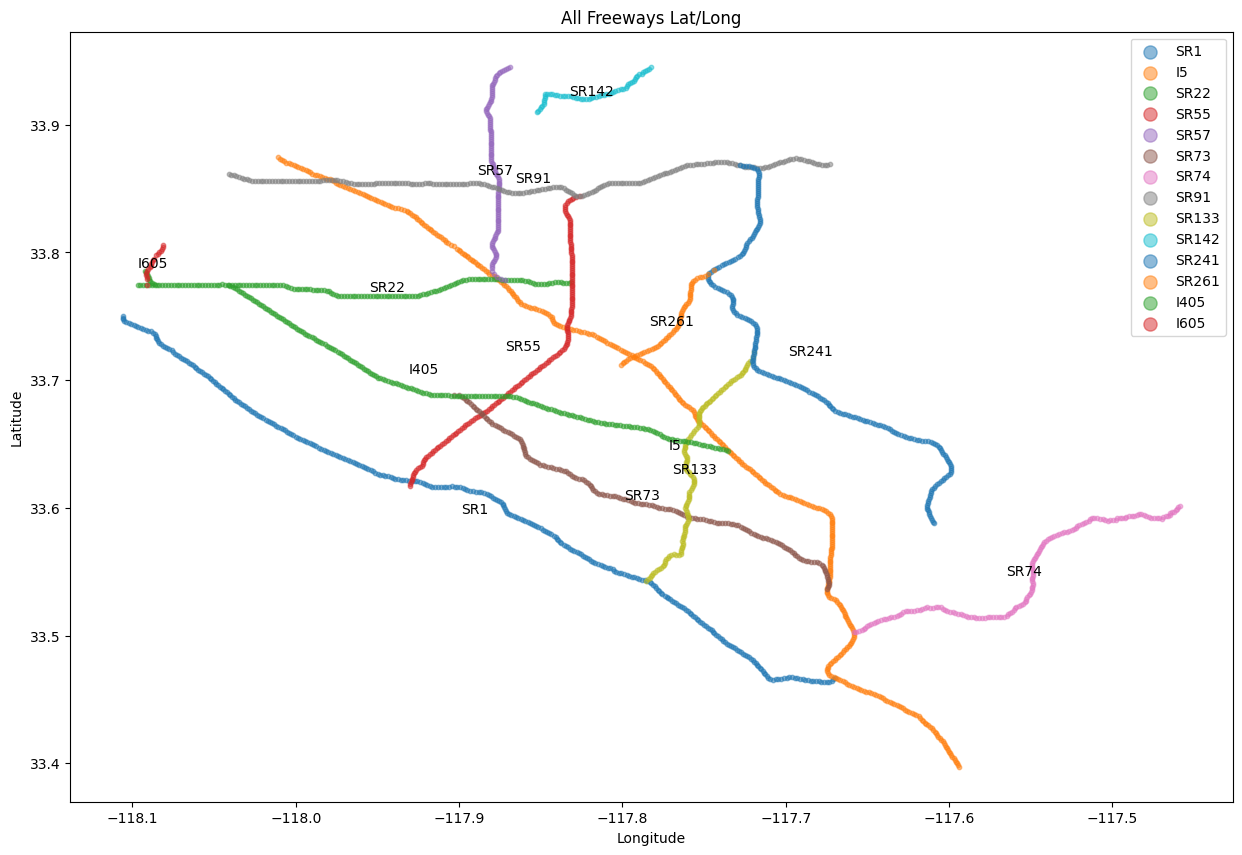

In [8]:
plt.figure(figsize=(15, 10))

plotted_routes = set()

for freeway in pd.read_excel('xlsx_files/d12det_health2024.xlsx')['Freeway'].unique():

    df = pd.read_excel(f'xlsx_files/{freeway}.xlsx')[pd.read_excel(f'xlsx_files/{freeway}.xlsx')['District'] == 12]
    route = freeway.split('-')[0]

    if route not in plotted_routes:
        plt.scatter(df['Longitude'], df['Latitude'], marker='o', label=f'{route}', s=10, alpha=0.5)
        midpoint = df[['Longitude', 'Latitude']].mean()
        plt.text(midpoint['Longitude'], midpoint['Latitude'], f'{route}', fontsize=10, ha='center', va='center')

        plotted_routes.add(route)

plt.title('All Freeways Lat/Long')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(markerscale=3)
plt.show()


In [9]:
# plt.figure(figsize=(15, 10))

# for freeway in pd.read_excel('xlsx_files/d12det_health2024.xlsx')['Freeway'].unique():
#     df = pd.read_excel(f'xlsx_files/{freeway}.xlsx')[pd.read_excel(f'xlsx_files/{freeway}.xlsx')['District'] == 12]
#     route = freeway.split('-')[0]

#     plt.scatter(df['Longitude'], df['Latitude'], marker='o', label=f'{route}', s=10, alpha=0.5)
#     midpoint = df[['Longitude', 'Latitude']].mean()

# plt.title('All Freeways Lat/Long')
# plt.xlabel('Longitude')
# plt.ylabel('Latitude')
# plt.legend(markerscale=3)


/var/folders/yl/_fjnz6h53yv8g0p40zrwgxsc0000gn/T/ipykernel_9413/3149151603.py:24: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), label='Average % Good')


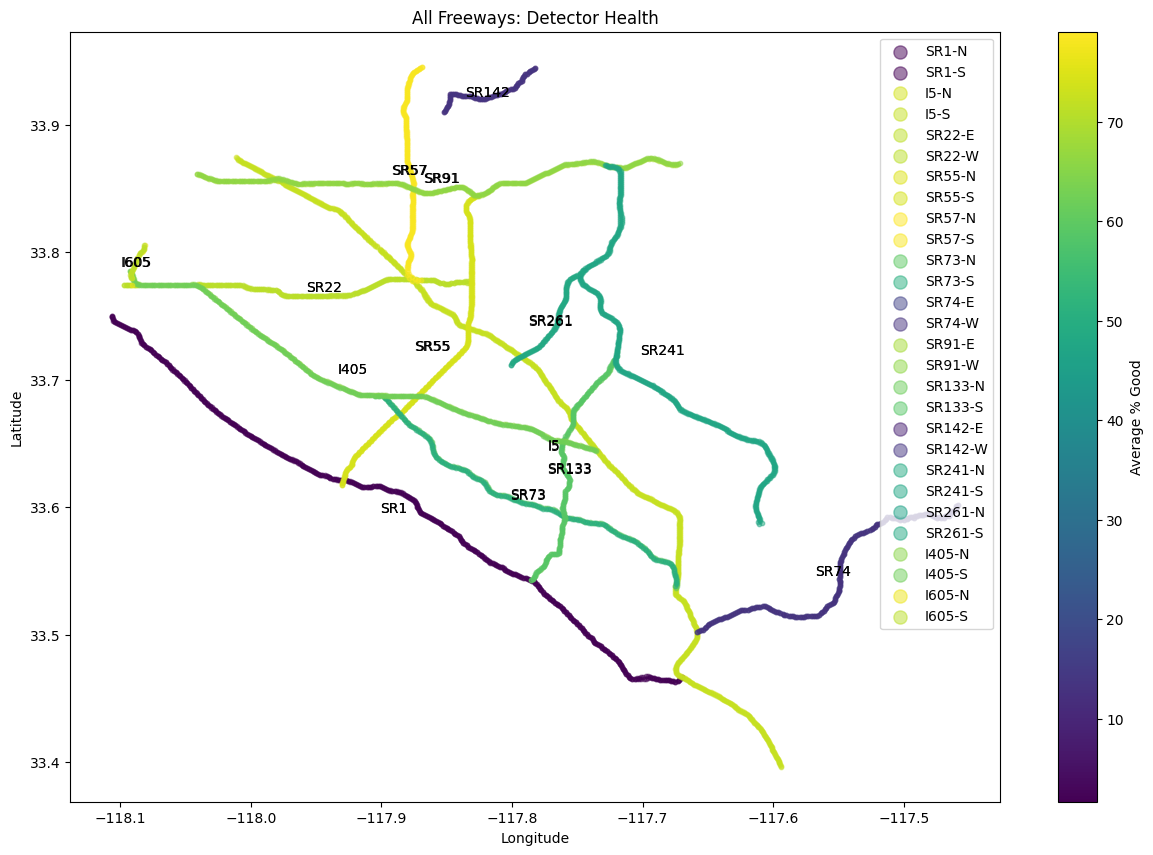

In [10]:
merged_data['Average % Good'] = merged_data.filter(like='% Good').mean(axis=1)
merged_data = merged_data[['Freeway', 'Average % Good']].sort_values(by='Average % Good', ascending=False)

plt.figure(figsize=(15, 10))
cmap = plt.get_cmap('viridis')
norm = plt.Normalize(merged_data['Average % Good'].min(), merged_data['Average % Good'].max())

for freeway in pd.read_excel('xlsx_files/d12det_health2024.xlsx')['Freeway'].unique():
    df = pd.read_excel(f'xlsx_files/{freeway}.xlsx')[pd.read_excel(f'xlsx_files/{freeway}.xlsx')['District'] == 12]
    
    if freeway in merged_data['Freeway'].values:
        color = cmap(norm(merged_data.loc[merged_data['Freeway'] == freeway, 'Average % Good'].values[0]))
    else:
        color = 'red'  # Default color if freeway not found in merged_data

    plt.scatter(df['Longitude'], df['Latitude'], marker='o', label=f'{freeway}', s=10, alpha=0.5, color=color)
    midpoint = df[['Longitude', 'Latitude']].mean()
    plt.text(midpoint['Longitude'], midpoint['Latitude'], f'{freeway.split("-")[0]}', fontsize=10, ha='center', va='center')

plt.title('All Freeways: Detector Health')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(markerscale=3)
plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), label='Average % Good')
plt.show()
